# Task 2: Visualization of Real Estate Price Distribution

## Dataset Description

The dataset consists of real estate listings with various features such as price, number of bedrooms, number of bathrooms, lot size, and house size. The dataset includes properties from different neighborhoods in Puerto Rico. Here are the key columns in the dataset:

- **brokered_by**: ID of the broker
- **status**: Status of the listing (e.g., for_sale)
- **price**: Price of the property
- **bed**: Number of bedrooms
- **bath**: Number of bathrooms
- **acre_lot**: Size of the lot in acres
- **street**: Street number
- **city**: City where the property is located
- **state**: State where the property is located
- **zip_code**: ZIP code of the property
- **house_size**: Size of the house in square feet
- **prev_sold_date**: Previous sale date (if available)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "C:\\Users\\HP\\Downloads\\archive (4)\\realtor-data.zip.csv"
df = pd.read_csv(file_path)

In [3]:
data = df.head(50000)

In [13]:
data.head(5)

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,1760.0,NaN


In [4]:
# Handle missing values for house_size by filling with median value
data['house_size'].fillna(data['house_size'].median(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_25484\1527870050.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['house_size'].fillna(data['house_size'].median(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_25484\1527870050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['house_size'].fillna(data['house_size'].median(), i

In [5]:
# Select only numeric columns for the correlation heatmap
numeric_cols = data.select_dtypes(include='number')

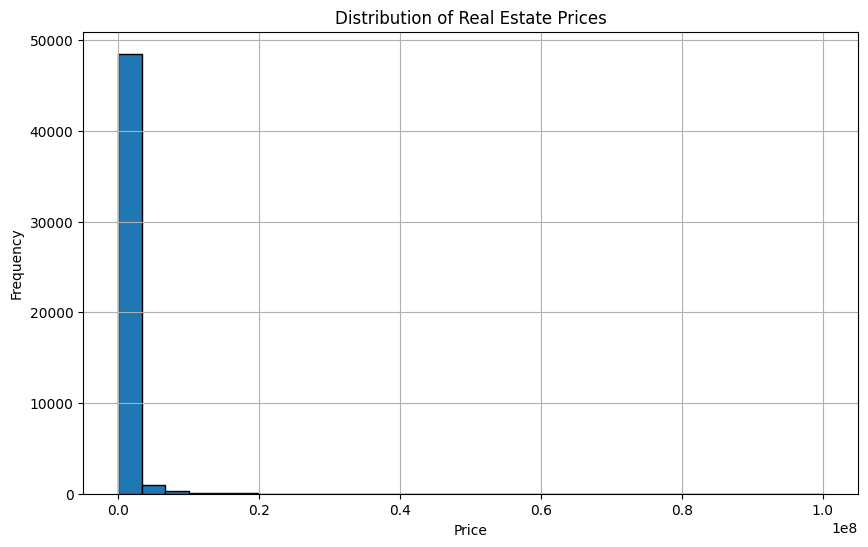

In [6]:
# Histogram to show the price distribution
plt.figure(figsize=(10, 6))
plt.hist(data['price'], bins=30, edgecolor='black')
plt.title('Distribution of Real Estate Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

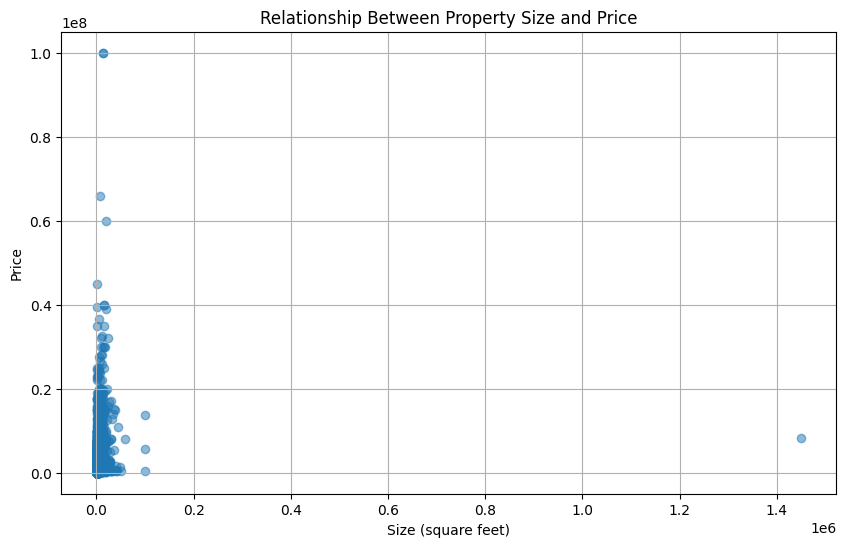

In [7]:
# Scatter plot to show the relationship between property size and price
plt.figure(figsize=(10, 6))
plt.scatter(data['house_size'], data['price'], alpha=0.5)
plt.title('Relationship Between Property Size and Price')
plt.xlabel('Size (square feet)')
plt.ylabel('Price')
plt.grid(True)
plt.show()

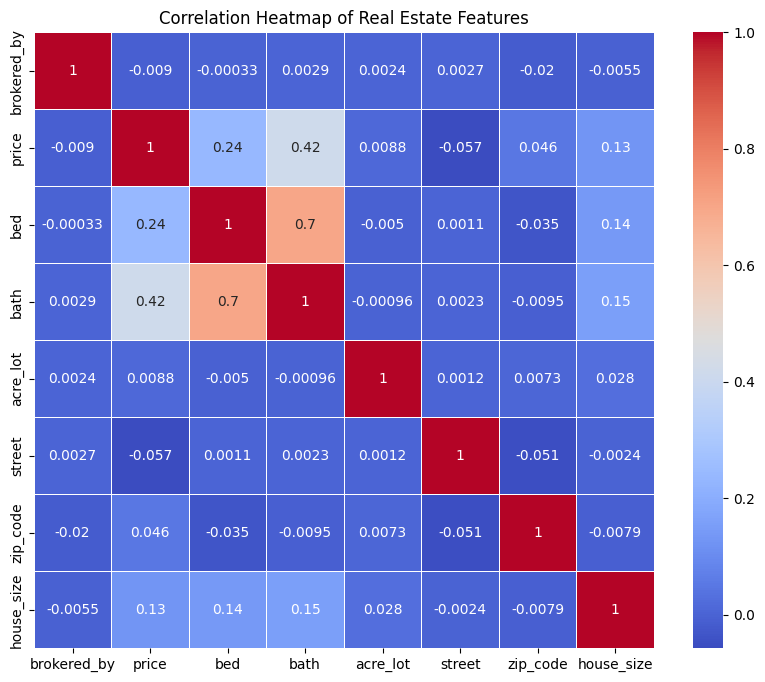

In [8]:
# Heatmap to visualize correlations between different numerical features
plt.figure(figsize=(10, 8))
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Real Estate Features')
plt.show()


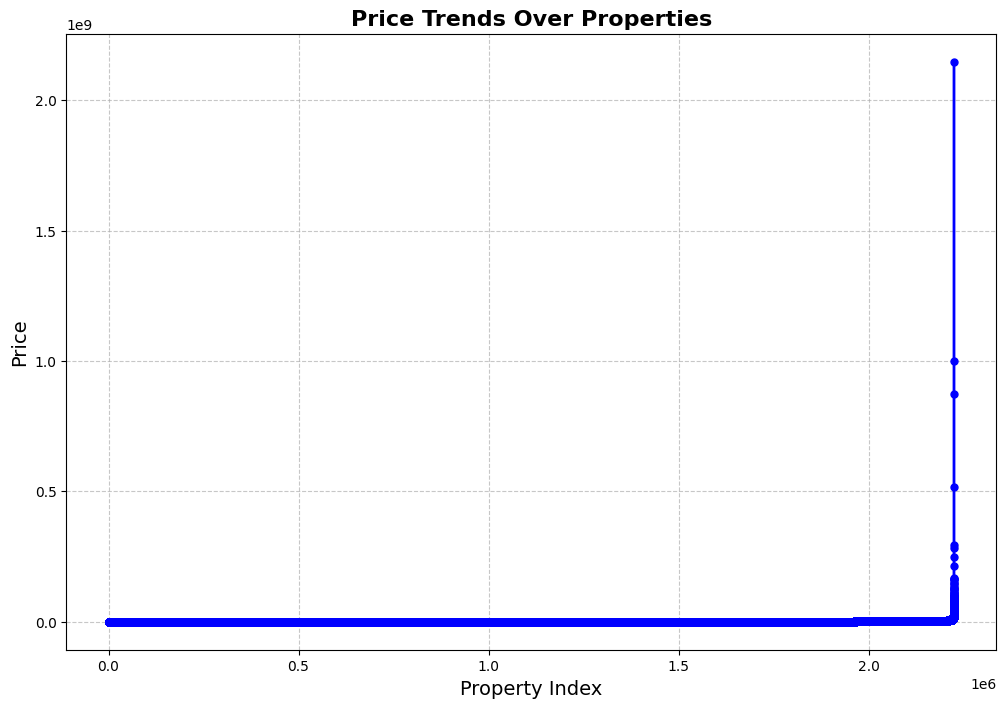

In [16]:
# Line plot to show price trends over properties sorted by price
sorted_df = df.sort_values(by='price')

plt.figure(figsize=(12, 8))
plt.plot(sorted_df['price'].values, marker='o', linestyle='-', color='b', linewidth=2, markersize=5)
plt.title('Price Trends Over Properties', fontsize=16, fontweight='bold')
plt.xlabel('Property Index', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

C:\Users\HP\AppData\Local\Temp\ipykernel_25484\2732327536.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='bed', y='price', data=df, ci=None , palette='Accent' )
C:\Users\HP\AppData\Local\Temp\ipykernel_25484\2732327536.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bed', y='price', data=df, ci=None , palette='Accent' )


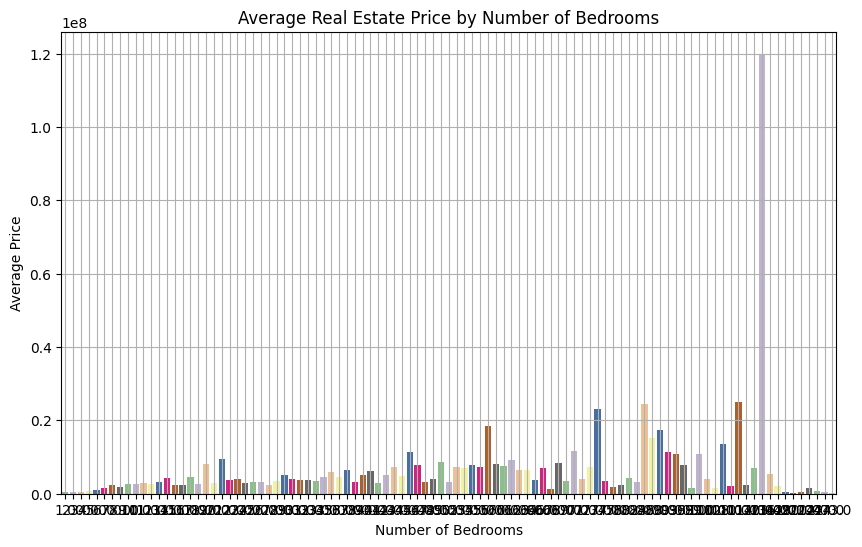

In [15]:
# 4. Bar plot to show average price per bedroom count
plt.figure(figsize=(10, 6))
sns.barplot(x='bed', y='price', data=df, ci=None , palette='Accent' )
plt.title('Average Real Estate Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()